<a href="https://colab.research.google.com/github/ElhamHosseini73/LearnNLP/blob/master/NaturalLanguageProcessingSpecialization/ClassificationAndVectorSpaces/Week3%20/Manipulating_word_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#create word embedding for word
#1. preprocess word(just stemming )
#2. embed with bert

In [3]:
import nltk
from nltk.stem import PorterStemmer

# Instantiate stemming class
stemmer = PorterStemmer()

def stemming_word(word):
    stem_word = stemmer.stem(word)  # stemming word
    return stem_word


In [ ]:
#embedding
!pip install -U sentence-transformers
from sentence_transformers import SentenceTransformer

#load model
model = SentenceTransformer('sentence-transformers/LaBSE')

In [5]:
#inference
def inference_bert(text):
  embeddings = model.encode(text)
  return embeddings

In [6]:
import numpy as np
words = ['oil', 'gas', 'happy', 'sad', 'city', 'town', 'village', 'country', 'continent', 'petroleum', 'joyful']

embed_words = []
for word in words:
  stem_word = stemming_word(word)
  embed_word = inference_bert(stem_word)
  embed_words.append(embed_word)

#It is important to note that we store each vector as a NumPy array. It allows us to use the linear algebra operations on it.
embed_word_matrix = np.matrix(embed_words)

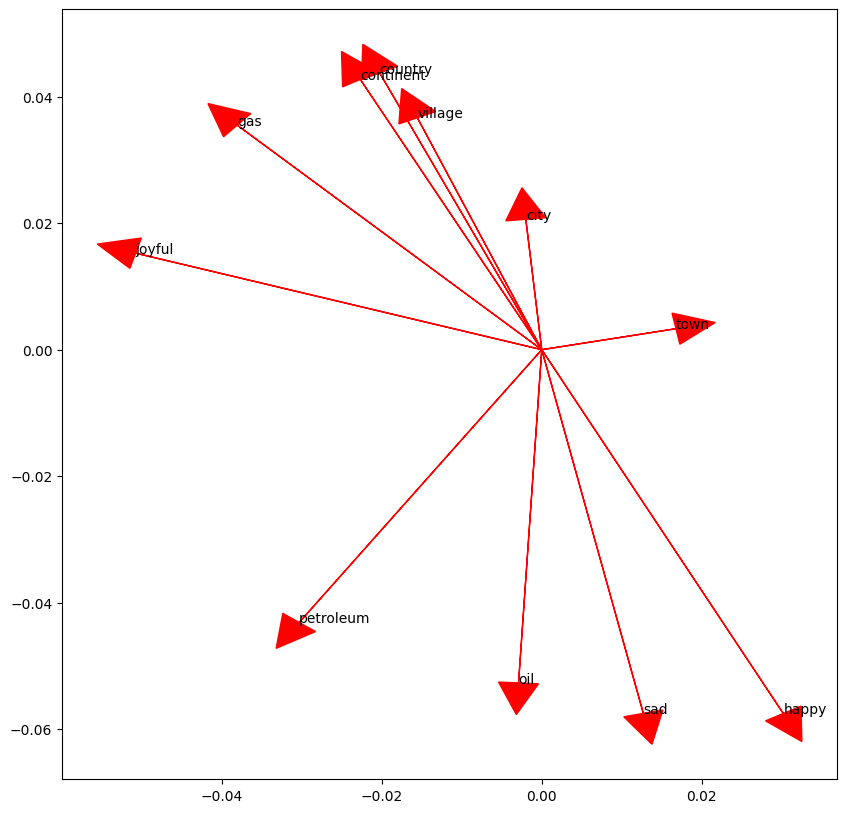

In [7]:
#plot
import matplotlib.pyplot as plt # Import matplotlib

fig, ax = plt.subplots(figsize = (10, 10)) # Create custom size image


for index in range(len(words)):
  ax.arrow(0, 0, embed_word_matrix[index,1], embed_word_matrix[index,0], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
  ax.annotate(words[index], (embed_word_matrix[index,1], embed_word_matrix[index,0]))

plt.show()

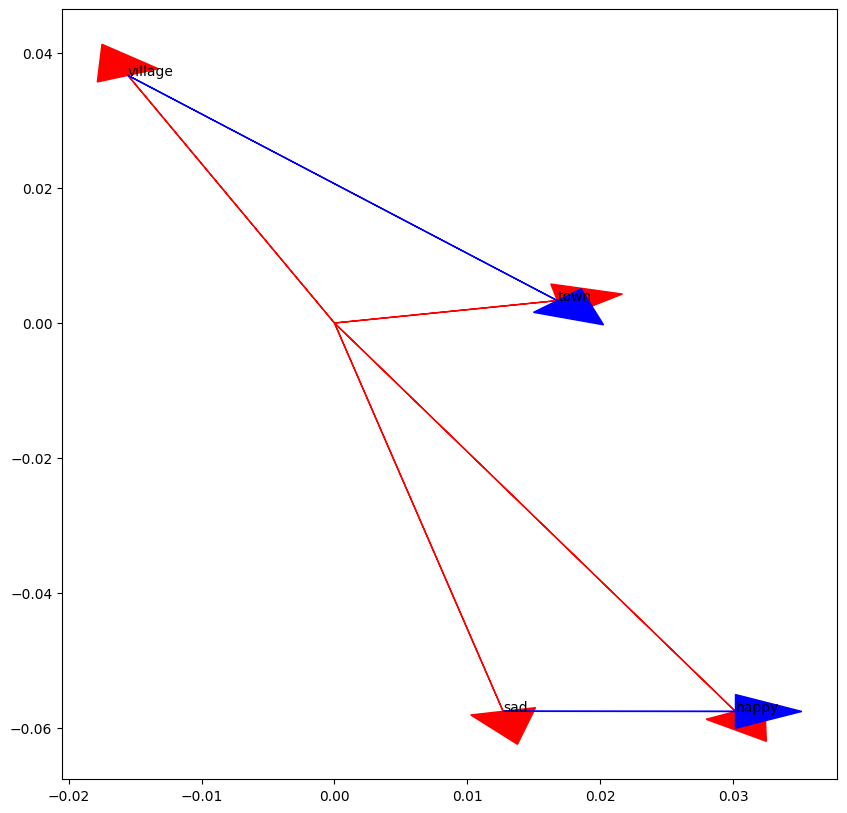

In [8]:
words = ['sad', 'happy', 'town', 'village']

list_embed_word = []
for word in words:
  stem_word = stemming_word(word)
  embed_word = inference_bert(stem_word)
  list_embed_word.append(embed_word)

matrix_embed_word = np.matrix(list_embed_word)

fig,ax = plt.subplots(figsize = (10, 10))

for index in range(len(words)):
  ax.arrow(0,0,matrix_embed_word[index,1], matrix_embed_word[index,0], head_width=0.005, head_length=0.005, fc='r', ec='r', width = 1e-5)
  ax.annotate(words[index],(matrix_embed_word[index,1], matrix_embed_word[index,0]))


embed_village = matrix_embed_word[3,:]
embed_town = matrix_embed_word[2,:]
diff = embed_town - embed_village

ax.arrow(embed_village[0,1],embed_village[0,0],diff[0,1],diff[0,0], head_width=0.005, head_length=0.005, fc='b', ec='b', width = 1e-5)


embed_sad = matrix_embed_word[0,:]
embed_happy = matrix_embed_word[1,:]
diff = embed_happy - embed_sad

ax.arrow(embed_sad[0,1],embed_sad[0,0],diff[0,1],diff[0,0], head_width=0.005, head_length=0.005, fc='b', ec='b', width = 1e-5)

plt.show()

In [23]:
#manipulating (we know embed Paris and France and Madrid now i want to know, what is embed of country of Madrid )
#predict capital of spain

#embed paris
stem_paris = stemming_word('Paris')
embed_paris =inference_bert(stem_paris)

#embed france
stem_France = stemming_word('France')
embed_France =inference_bert(stem_France)

#embed Madrid
stem_Madrid = stemming_word('Madrid')
embed_Madrid =inference_bert(stem_Madrid)

diff_paris_france = embed_France - embed_paris
guess_embed_spain = diff_paris_france + embed_Madrid

words = ['country','city','China','Iraq','oil','town','Canada','London','England','Australia','France','Spain']

list_word_embed = []
for word in words:
  stem_word = stemming_word(word)
  embed_word =inference_bert(stem_word)
  list_word_embed.append(embed_word)

matrix_embed_words = np.matrix(list_word_embed)


(12, 768)


In [29]:
#now i want to know guess_embed_spain obtained is similar to which of the following words embed
def calculate_simillarity():

  list_euclidean_words = []
  for index in range(len(list_word_embed)):
    norm_word = np.linalg.norm(matrix_embed_words[index,:] - guess_embed_spain)
    list_euclidean_words.append(norm_word)

  # Find the index of the minimun distance in the list
  min_value = min(list_euclidean_words)

  #return the index of minimum value
  min_index=list_euclidean_words.index(min_value)

  similar_word = words[min_index]


  return similar_word

In [ ]:
print(calculate_simillarity())